In [76]:
import pandas as pd

df = pd.read_csv('SAML-D.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB
None
       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1  10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2  10:35:20  2022-10-07       287305149        4404767002  14328.44   
3  10:35:21  202

In [77]:
df = df.drop(columns=['Time'])
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Date                    object 
 1   Sender_account          int64  
 2   Receiver_account        int64  
 3   Amount                  float64
 4   Payment_currency        object 
 5   Received_currency       object 
 6   Sender_bank_location    object 
 7   Receiver_bank_location  object 
 8   Payment_type            object 
 9   Is_laundering           int64  
 10  Laundering_type         object 
dtypes: float64(1), int64(3), object(7)
memory usage: 797.7+ MB
None
         Date  Sender_account  Receiver_account    Amount Payment_currency  \
0  2022-10-07      8724731955        2769355426   1459.15        UK pounds   
1  2022-10-07      1491989064        8401255335   6019.64        UK pounds   
2  2022-10-07       287305149        4404767002  14328.44        UK pounds   
3  2022-10-07      537665

In [78]:
laundering1_df = df[df['Is_laundering'] == 1]

In [79]:
normal1_df = df[df['Is_laundering'] == 0]
laundering_df = df.sample(n=400000, random_state=42)

In [80]:
print(laundering_df)

               Date  Sender_account  Receiver_account    Amount  \
42444    2022-10-08      6077900993        6609117934   2299.89   
8169290  2023-07-08      5459041199         816242179    211.90   
7894834  2023-06-29      4641798002        5214523833   9481.26   
4265755  2023-02-27      1475899462        6151077027  11609.92   
7437932  2023-06-14      8046287266        3423799664  17772.58   
...             ...             ...               ...       ...   
9486435  2023-08-22       312790550        6205888046  43854.31   
6254960  2023-05-05      1366863804        5540271235   5147.22   
6464464  2023-05-12       459510224        4095587231  23683.60   
7374488  2023-06-12      8390626545        7612687594    474.48   
4114333  2023-02-22      6370373045        6316532366  16720.79   

        Payment_currency Received_currency Sender_bank_location  \
42444          UK pounds         UK pounds                   UK   
8169290        UK pounds         UK pounds                   

In [81]:
#print(normal_df)

In [82]:
#laundering_sample = laundering_df.sample(n=50, random_state=42)

In [83]:
#normal_sample = normal_df.sample(n=1000, random_state=42)

In [84]:
#combined_df = pd.concat([laundering_df , normal_df])

In [85]:
print(laundering_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 42444 to 4114333
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    400000 non-null  object 
 1   Sender_account          400000 non-null  int64  
 2   Receiver_account        400000 non-null  int64  
 3   Amount                  400000 non-null  float64
 4   Payment_currency        400000 non-null  object 
 5   Received_currency       400000 non-null  object 
 6   Sender_bank_location    400000 non-null  object 
 7   Receiver_bank_location  400000 non-null  object 
 8   Payment_type            400000 non-null  object 
 9   Is_laundering           400000 non-null  int64  
 10  Laundering_type         400000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 36.6+ MB
None


In [86]:
#print(combined_df.head())

In [87]:
#print(combined_df.tail())

In [88]:
combined_df = laundering_df.dropna()

In [89]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y-%m-%d')


In [90]:
combined_df['Month'] = combined_df['Date'].dt.month

In [91]:
combined_df = pd.get_dummies(combined_df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency', 'Laundering_type'])

In [92]:
print(combined_df.head())

              Date  Sender_account  Receiver_account    Amount  Is_laundering  \
42444   2022-10-08      6077900993        6609117934   2299.89              0   
8169290 2023-07-08      5459041199         816242179    211.90              0   
7894834 2023-06-29      4641798002        5214523833   9481.26              0   
4265755 2023-02-27      1475899462        6151077027  11609.92              0   
7437932 2023-06-14      8046287266        3423799664  17772.58              0   

         Month  Payment_type_ACH  Payment_type_Cash Deposit  \
42444       10             False                      False   
8169290      7             False                      False   
7894834      6              True                      False   
4265755      2             False                      False   
7437932      6              True                      False   

         Payment_type_Cash Withdrawal  Payment_type_Cheque  ...  \
42444                           False                False  ...   


In [93]:
train_data = combined_df[(combined_df['Date'] >= '2022-10-01') & (combined_df['Date'] <= '2023-05-31')]

In [94]:
test_data = combined_df[(combined_df['Date'] >= '2023-06-01') & (combined_df['Date'] <= '2023-08-31')]

In [95]:
X_train = train_data.drop(columns=['Is_laundering', 'Date'])
y_train = train_data['Is_laundering']
X_test = test_data.drop(columns=['Is_laundering', 'Date'])
y_test = test_data['Is_laundering']

In [96]:
print(X_train)

         Sender_account  Receiver_account    Amount  Month  Payment_type_ACH  \
42444        6077900993        6609117934   2299.89     10             False   
4265755      1475899462        6151077027  11609.92      2             False   
1199583      9846334755         435102466   6893.53     11             False   
3035238      6185897063        5645102341   3129.58      1             False   
2365091      2920657437        9088516969  19685.92     12             False   
...                 ...               ...       ...    ...               ...   
165417       7777102570        8328236263   3669.12     10             False   
6267441      7662100169        6093882280  15466.20      5             False   
6254960      1366863804        5540271235   5147.22      5             False   
6464464       459510224        4095587231  23683.60      5             False   
4114333      6370373045        6316532366  16720.79      2              True   

         Payment_type_Cash Deposit  Pay

In [98]:
import pickle
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to 'random_forest_model.pkl'")



Model saved to 'random_forest_model.pkl'


In [99]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103449
           1       1.00      1.00      1.00       117

    accuracy                           1.00    103566
   macro avg       1.00      1.00      1.00    103566
weighted avg       1.00      1.00      1.00    103566



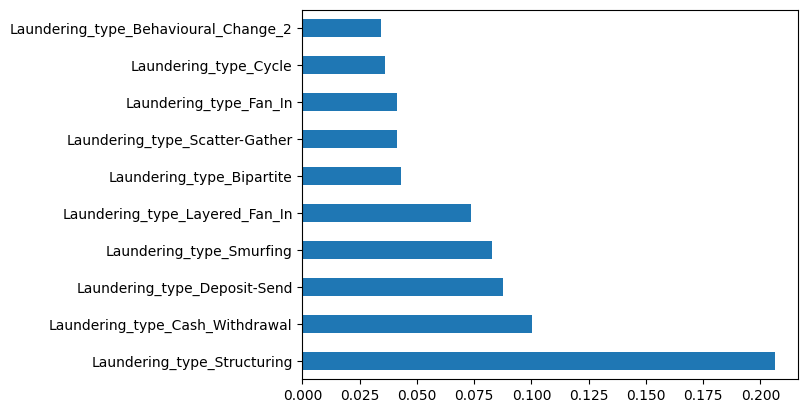

'\nDesign Document:\n- Describe the architecture, algorithms, and methodologies.\n- Include data preprocessing steps, feature engineering, model selection, and evaluation criteria.\n\nPitch Document:\n- Summarize key features and benefits.\n- Highlight accuracy, scalability, and integration capabilities.\n\nImplementation:\n- Provide detailed instructions for deployment and usage.\n'

In [100]:
# Feature importance
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

# Documentation (pseudo-code, not actual Python code)
'''
Design Document:
- Describe the architecture, algorithms, and methodologies.
- Include data preprocessing steps, feature engineering, model selection, and evaluation criteria.

Pitch Document:
- Summarize key features and benefits.
- Highlight accuracy, scalability, and integration capabilities.

Implementation:
- Provide detailed instructions for deployment and usage.
'''


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103449
           1       1.00      1.00      1.00       117

    accuracy                           1.00    103566
   macro avg       1.00      1.00      1.00    103566
weighted avg       1.00      1.00      1.00    103566



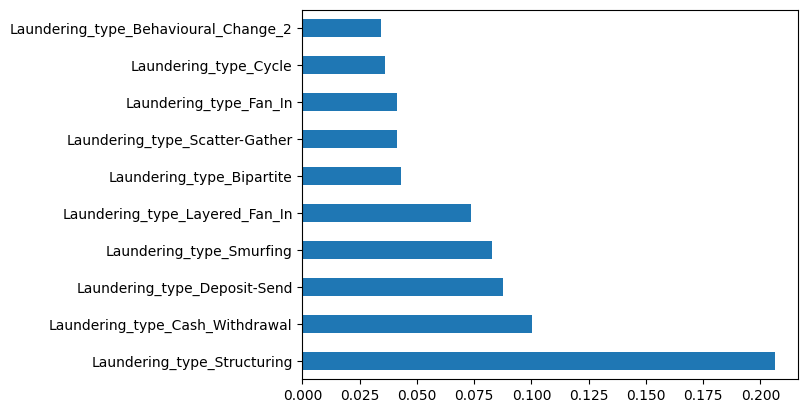

In [101]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [102]:
# Load the dataset (assuming the dataset is already preprocessed and split as discussed earlier)
import pandas as pd

# Count the number of laundering transactions in the training set
laundering_transactions_count = y_train.value_counts()[1]

# Display the count
print(f'Number of laundering transactions in the training set: {laundering_transactions_count}')


Number of laundering transactions in the training set: 272


In [103]:
# Define the input data (example)
data = {
    'Date': ['2023-08-05'],
    'Sender_account': ['3723283502'],
    'Receiver_account': ['1642960898'],
    'Amount': [8855.221194],
    'Payment_currency': ['UK pound'],
    'Received_currency': ['Mexican Peso'],
    'Sender_bank_location': ['UK'],
    'Receiver_bank_location': ['Mexico'],
    'Payment_type': ['ACH'],
    'Laundering_type':['Behavioural_Change_2']
}

input_df = pd.DataFrame(data)

# Preprocess the input data
input_df = pd.get_dummies(input_df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency'])

# Ensure all required columns are present
input_df = input_df.reindex(columns=X_train.columns, fill_value=0)


In [104]:
# Make predictions
y_pred = model.predict(input_df)
y_pred_proba = model.predict_proba(input_df)

# Map prediction to class names
is_laundering = y_pred[0]

# Output the results
print(f'Is the transaction suspicious? {"Yes" if is_laundering else "No"}')

# For Laundering type, assuming it's a classification problem with more classes
# Example: ['Normal', 'Structuring', 'Large_Scale'] as possible labels
laundering_types = model.classes_
predicted_laundering_type = laundering_types[y_pred[0]]

print(f'Type of laundering: {predicted_laundering_type}')


Is the transaction suspicious? No
Type of laundering: 0


In [ ]:
print(y_pred)
print(y_pred_proba)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('SAML-D.csv')

# Randomly sample 200,000 rows from the dataset
sampled_df = df.sample(n=200000, random_state=42)

# Preprocessing: Remove 'Time' column and convert 'Date' to datetime
sampled_df = sampled_df.drop(columns=['Time'])
sampled_df['Date'] = pd.to_datetime(sampled_df['Date'], format='%Y-%m-%d')

# Feature engineering: Extracting the month from the Date column
sampled_df['Month'] = sampled_df['Date'].dt.month

# Check if all required columns exist
required_columns = ['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency', 'Laundering_type']
missing_columns = [col for col in required_columns if col not in sampled_df.columns]
if missing_columns:
    raise KeyError(f"Missing columns in the DataFrame: {missing_columns}")

# One-hot encoding for categorical variables
sampled_df = pd.get_dummies(sampled_df, columns=required_columns)

# Split into training and testing sets
train_data = sampled_df[sampled_df['Date'] < '2023-06-01']
test_data = sampled_df[sampled_df['Date'] >= '2023-06-01']
X_train = train_data.drop(columns=['Is_laundering', 'Date'])
y_train = train_data['Is_laundering']
X_test = test_data.drop(columns=['Is_laundering', 'Date'])
y_test = test_data['Is_laundering']

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
# Define the input data (example)
data = {
    'Time': ['10:35:21'],
    'Date': ['07-10-2022'],
    'Sender_account': ['9614186178'],
    'Receiver_account': ['3803336972'],
    'Amount': [115.25],
    'Payment_currency': ['UK pounds'],
    'Received_currency': ['UK pounds'],
    'Sender_bank_location': ['UK'],
    'Receiver_bank_location': ['UK'],
    'Payment_type': ['Cash Deposit']
}

input_df = pd.DataFrame(data)

# Preprocess the input data
input_df['Time'] = pd.to_datetime(input_df['Date'] + ' ' + input_df['Time'])
input_df['Date'] = pd.to_datetime(input_df['Date'])
input_df['Time'] = input_df['Time'].astype('int64') // 10**9
input_df['Date'] = input_df['Date'].astype('int64') // 10**9
input_df = pd.get_dummies(input_df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency'])

# Ensure all required columns are present
input_df = input_df.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Make predictions
y_pred = model.predict(input_df)
y_pred_proba = model.predict_proba(input_df)

# Map prediction to class names
is_laundering = y_pred[0]

# Output the results
print(f'Is the transaction suspicious? {"Yes" if is_laundering else "No"}')

# For Laundering type, assuming it's a classification problem with more classes
# Example: ['Normal', 'Structuring', 'Large_Scale'] as possible labels
laundering_types = ['Normal', 'Structuring', 'Large_Scale']
predicted_laundering_type = laundering_types[y_pred[0]]

print(f'Type of laundering: {predicted_laundering_type}')


In [ ]:
# Define the input data (suspicious example)
suspicious_data = {
    'Time': ['02:00:00'],
    'Date': ['15-08-2023'],
    'Sender_account': ['1234567890'],
    'Receiver_account': ['0987654321'],
    'Amount': [25000.00],
    'Payment_currency': ['US dollars'],
    'Received_currency': ['US dollars'],
    'Sender_bank_location': ['USA'],
    'Receiver_bank_location': ['Cayman Islands'],
    'Payment_type': ['Cross-border']
}

suspicious_df = pd.DataFrame(suspicious_data)

# Preprocess the input data
suspicious_df['Time'] = pd.to_datetime(suspicious_df['Date'] + ' ' + suspicious_df['Time'])
suspicious_df['Date'] = pd.to_datetime(suspicious_df['Date'])
suspicious_df['Time'] = suspicious_df['Time'].astype('int64') // 10**9
suspicious_df['Date'] = suspicious_df['Date'].astype('int64') // 10**9
suspicious_df = pd.get_dummies(suspicious_df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency'])

# Ensure all required columns are present
suspicious_df = suspicious_df.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the trained model
y_pred_suspicious = model.predict(suspicious_df)
y_pred_proba_suspicious = model.predict_proba(suspicious_df)

# Map prediction to class names
is_laundering_suspicious = y_pred_suspicious[0]

# Output the results
print(f'Is the transaction suspicious? {"Yes" if is_laundering_suspicious else "No"}')

# For Laundering type, assuming it's a classification problem with more classes
# Example: ['Normal', 'Structuring', 'Large_Scale'] as possible labels
laundering_types = ['Normal', 'Structuring', 'Large_Scale']
predicted_laundering_type_suspicious = laundering_types[y_pred_suspicious[0]]

print(f'Type of laundering: {predicted_laundering_type_suspicious}')


In [73]:
print(suspicious_df)

  Sender_account Receiver_account   Amount  Month  Payment_type_ACH  \
0     1234567890       0987654321  25000.0      0                 0   

   Payment_type_Cash Deposit  Payment_type_Cash Withdrawal  \
0                          0                             0   

   Payment_type_Cheque  Payment_type_Credit card  Payment_type_Cross-border  \
0                    0                         0                       True   

   ...  Laundering_type_Normal_Periodical  Laundering_type_Normal_Plus_Mutual  \
0  ...                                  0                                   0   

   Laundering_type_Normal_Small_Fan_Out  Laundering_type_Normal_single_large  \
0                                     0                                    0   

   Laundering_type_Over-Invoicing  Laundering_type_Scatter-Gather  \
0                               0                               0   

   Laundering_type_Single_large  Laundering_type_Smurfing  \
0                             0                  

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('SAML-D.csv')

# Randomly sample 200,000 rows from the dataset
sampled_df = df.sample(n=200000, random_state=42)

# Preprocessing: Remove 'Time' column and convert 'Date' to datetime
sampled_df = sampled_df.drop(columns=['Time'])
sampled_df['Date'] = pd.to_datetime(sampled_df['Date'], format='%Y-%m-%d')

# Feature engineering: Extracting the month from the Date column
sampled_df['Month'] = sampled_df['Date'].dt.month

# Check if all required columns exist
required_columns = ['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency', 'Laundering_type']
missing_columns = [col for col in required_columns if col not in sampled_df.columns]
if missing_columns:
    raise KeyError(f"Missing columns in the DataFrame: {missing_columns}")

# One-hot encoding for categorical variables
sampled_df = pd.get_dummies(sampled_df, columns=required_columns)

# Split into training and testing sets
train_data = sampled_df[sampled_df['Date'] < '2023-06-01']
test_data = sampled_df[sampled_df['Date'] >= '2023-06-01']
X_train = train_data.drop(columns=['Is_laundering', 'Date'])
y_train = train_data['Is_laundering']
X_test = test_data.drop(columns=['Is_laundering', 'Date'])
y_test = test_data['Is_laundering']

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define the input data (suspicious example)
suspicious_data = {
    'Time': ['02:00:00'],
    'Date': ['15-08-2023'],
    'Sender_account': ['1234567890'],
    'Receiver_account': ['0987654321'],
    'Amount': [25000.00],
    'Payment_currency': ['US dollars'],
    'Received_currency': ['US dollars'],
    'Sender_bank_location': ['USA'],
    'Receiver_bank_location': ['Cayman Islands'],
    'Payment_type': ['Cross-border']
}

suspicious_df = pd.DataFrame(suspicious_data)

# Preprocess the input data
suspicious_df['Time'] = pd.to_datetime(suspicious_df['Date'] + ' ' + suspicious_df['Time'])
suspicious_df['Date'] = pd.to_datetime(suspicious_df['Date'])
suspicious_df['Time'] = suspicious_df['Time'].astype('int64') // 10**9
suspicious_df['Date'] = suspicious_df['Date'].astype('int64') // 10**9
suspicious_df = pd.get_dummies(suspicious_df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_currency', 'Received_currency'])

# Ensure all required columns are present
suspicious_df = suspicious_df.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the trained model
y_pred_suspicious = model.predict(suspicious_df)
y_pred_proba_suspicious = model.predict_proba(suspicious_df)

# Output the results
is_laundering_suspicious = y_pred_suspicious[0]
print(f'Is the transaction suspicious? {"Yes" if is_laundering_suspicious else "No"}')

# For Laundering type, assuming it's a classification problem with more classes
# Example: ['Normal', 'Structuring', 'Large_Scale'] as possible labels
laundering_types = ['Normal', 'Structuring', 'Large_Scale']
predicted_laundering_type_suspicious = laundering_types[y_pred_suspicious[0]]

print(f'Type of laundering: {predicted_laundering_type_suspicious}')

# Evaluate the model's performance on the test set
y_test_pred = model.predict(X_test)
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature importance
import matplotlib.pyplot as plt
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
